# Coupled Mass-Spring System - ELLIS333
## Numerical investigation of the Example from Reader 5
Copyright Alastair McLean

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as pltfm
from scipy.integrate import odeint
%matplotlib inline

We will examine the numerical solution of the coupled equations of motion for the two mass system. For more details refer to the example in the Reader where the theory is developed in detail. The only difference between the case we consider here and the Reader is that here we include damping. However, by setting the damping coefficients equal to zero, one can consider the undamped case. 

The EOM for each mass is: 

\begin{eqnarray*}
m_1\ddot x_1 + c_1\dot x_1+ (k_1+k_2)x_1 - k_2 x_2 &=&0\\
m_2\ddot x_2 + c_2\dot x_2+- kx_1 + (k_2+k_3) x_2 &=&0
\end{eqnarray*}

This is a pair of coupled second order equations. To solve this system with one of the ODE solvers provided by SciPy, we must first convert this to a system of first order differential equations. We introduce two variables

\begin{equation}
v_1 = \dot x_1 \ \ \ v_2 = \dot x_2
\end{equation}

These are the velocities of the masses.
With a little algebra, we can rewrite the two second order equations as a system of four first order equations:

\begin{equation}
\dot x_1 = v_1
\end{equation}

\begin{equation}
\dot v_1 = (-c_1 v_1 - (k_1+k_2)x_1+k_2x_2))/m_1
\end{equation}

\begin{equation}
\dot x_2 = v_2
\end{equation}

\begin{equation}
\dot v_2 = (-c_2 v_2 +k_2x_1-(k_2+k_3)x_2)/m_2
\end{equation}



These equations are now in a form that we can implement in Python.
The following code defines the "right hand side" of the system of equations (also known as a vector field). I have chosen to put the function that defines the vector field in its own module (i.e. in its own file), but this is not necessary. Note that the arguments of the function vectorfield are configured to be used with the odeint function: the time t is the second argument.

### Functions

In [2]:
# the phase plot for either mass 1 (mass = 1) or mass 2 (mass = 2)
def phaseplot(time, sol, mass):
    if mass == 1:
        m = 0
    elif mass == 2:
        m = 2
    plt.figure(figsize=(12, 6))
    G = gridspec.GridSpec(2, 2)
    axes_1 = plt.subplot(G[0, :-1])
    xmax = 1.1*np.amax(sol[:,m])
    xmin = 1.1*np.amin(sol[:,m])
    plt.plot(time, sol[:,m],'r-')
    plt.xlabel('t (s)', fontsize=16)
    plt.ylabel('x (m)', fontsize=16)
    plt.ylim(xmin, xmax)
    axes_2 = plt.subplot(G[-1, 0])
    vmax = 1.1*np.amax(sol[:,m+1])
    vmin = 1.1*np.amin(sol[:,m+1])
    plt.plot(time, sol[:,m+1],'y-')
    plt.xlabel('t (s)', fontsize=16)
    plt.ylabel('v (m/s)', fontsize=16)
    plt.ylim(vmin, vmax)
    axes_3 = plt.subplot(G[:, -1])
    plt.plot(sol[:,m], sol[:,m+1], 'g-')
    plt.xlabel('x (m)', fontsize=16)
    plt.ylabel('v (m/s)', fontsize=16)
    plt.xlim(xmin, xmax)
    plt.ylim(vmin, vmax)
    plt.tight_layout()
    #plt.savefig('05-somename.pdf')
    plt.show()
    
def vectorfield(w, t, p):
    x1, v1, x2, v2 = w
    m1, m2, k1, k2, k3, c1, c2, F, drive = p
    f = [v1,(-c1 * v1 - (k1 + k2) * x1 + k2 * x2 + F * np.sin(drive * t)) / m1,
         v2,(-c2 * v2 + k2 * x1 - (k2 + k3)*x2) / m2]
    return f

def runintegrator():
    abserr = 1.0e-8
    relerr = 1.0e-6
    p = [m1, m2, k1, k2, k3, c1, c2, F, drive]
    w0 = [x1, v1, x2, v2]
    soln = odeint(vectorfield, w0, t, args=(p,), atol=abserr, rtol=relerr) 
    return soln

def responsephysicalcoordinates():
    plt.figure(1, figsize=(10, 5.0))
    plt.ylabel('$x_1, x_2$', fontsize = 16)
    plt.xlabel('t / s', fontsize = 16)
    plt.grid(True)
    plt.plot(t, solution[:,0], 'y', linewidth = 1)
    plt.plot(t, solution[:,2], 'g', linewidth = 1)
    plt.legend((r'$x_1$', r'$x_2$'), prop=pltfm.FontProperties(size=16))
    plt.title('physical coordinates: $x_1$ and $x_2$', fontsize = 16)
    #plt.savefig('05-driven-physicalcoodinates.pdf')
    plt.show()

def responsenormalcoordinates():
    plt.figure(1, figsize=(10, 5.0))
    plt.xlabel('t')
    plt.grid(True)
    plt.plot(t, solution[:,0]+solution[:,2], 'y', linewidth = 1)
    plt.plot(t, solution[:,0]-solution[:,2], 'g', linewidth = 1)
    plt.legend((r'$q_1$', r'$q_2$'), prop=pltfm.FontProperties(size=16))  
    plt.title('normal coordinates $q_1$ and $q_2$', fontsize = 16)
    #plt.savefig('05-driven-normalcoodinates.pdf')
    plt.show()

**Parameter values** Values that should be very familiar by now.

In [3]:
m1 = 0.1
m2 = 0.1
k1 = 4.0
k2 = 4.0
k3 = 4.0
c1 = 0.0001
c2 = 0.0001
F = 0.0
#F = 1.0
w1 = np.sqrt(k1/m1)
w2 = np.sqrt(3.0)*np.sqrt(k1/m1)  
drive = w2

**Initial conditions** it should be clear what these are

In [4]:
displacement = 0.1
x1 = displacement
v1 = 0.0
x2 = 0.0
v2 = 0.0

**time** vector

In [23]:
stoptime = 1000.0
numpoints = 1000000
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

### integrate

In [24]:
solution = runintegrator()

### The response - physical coordinates $x_1$ and $x_2$

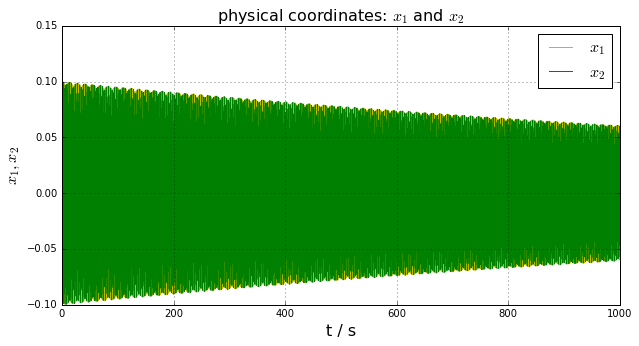

In [25]:
responsephysicalcoordinates()

### The response - normal coordinates $q_1$ and $q_2$

$$
q_1 = x_1 + x_2 \ \ \ \ \ 
q_2 = x_1 - x_2
$$

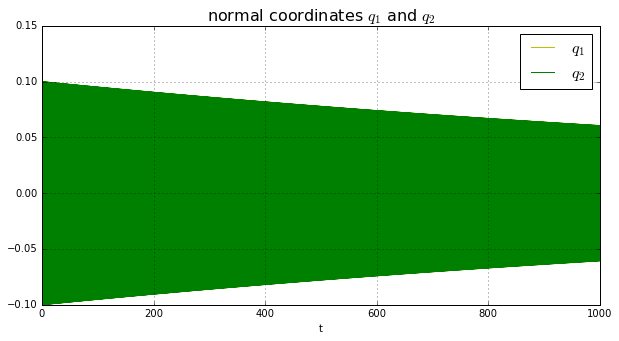

In [26]:
responsenormalcoordinates()

### Phase plot for m1

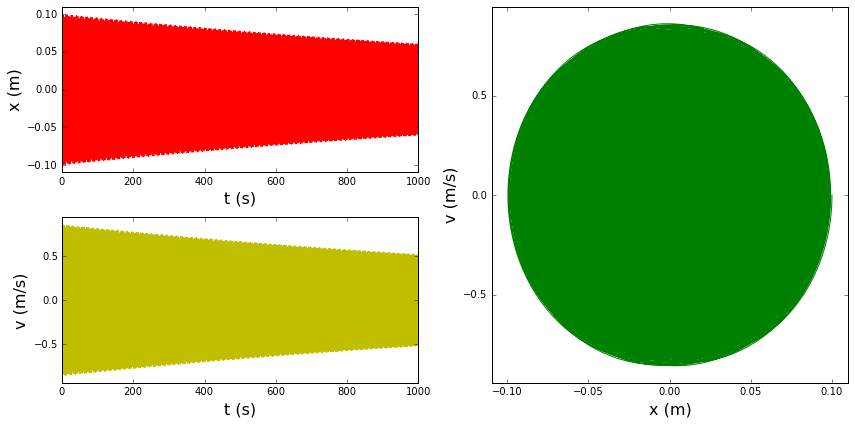

In [27]:
phaseplot(t, solution, 1)

### Phase plot for m2

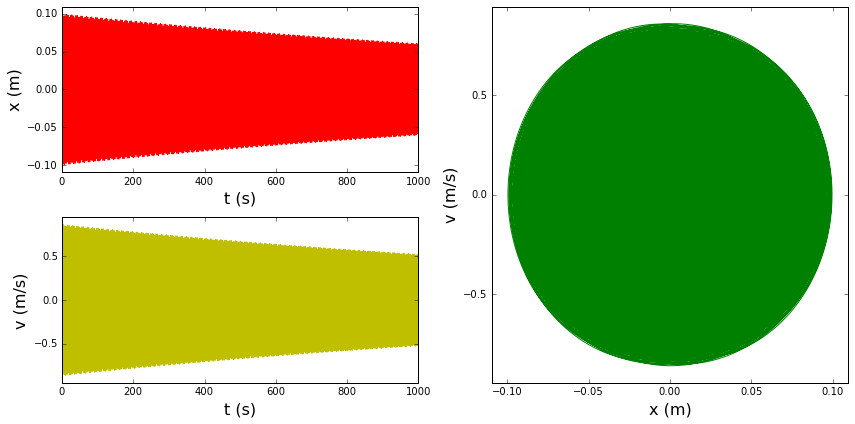

In [28]:
phaseplot(t, solution, 2)

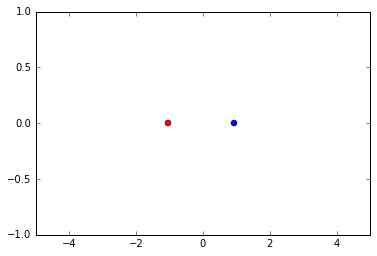

In [31]:
import wt_utils

def myfunc(i):
    i = int(i)
#     print(i, t[i], solution[:,1][i])
    plt.plot([solution[:,1][i]+1], [0], 'bo')
    plt.plot([solution[:,2][i]-1], [0], 'ro')
    plt.xlim([-5,5])
    plt.ylim([-1,1])

wt_utils.animate(myfunc, i=np.arange(5000,len(t),500), speed=5)